<a href="https://colab.research.google.com/github/LuchoValr/machine_sebastian/blob/main/Cap3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##First steps with scikit-learn training a perceptron

In [5]:
from sklearn import datasets
import numpy as np

In [6]:
iris = datasets.load_iris()

In [7]:
X = iris.data[:, [2, 3]]
y = iris.target
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [8]:
#Using the train_test_split function from scikit-learn’s model_selection module, we randomly split the
#X and y arrays into 30 percent test data (45 examples) and 70 percent training data (105 examples):

#Note that the train_test_split function already shuffles the training datasets internally before splitting;
#otherwise, all examples from class 0 and class 1 would have ended up in the training datasets,
#and the test dataset would consist of 45 examples from class 2. Via the random_state parameter, we
#provided a fixed random seed (random_state=1) for the internal pseudo-random number generator
#that is used for shuffling the datasets prior to splitting. Using such a fixed random_state ensures that
#our results are reproducible.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [10]:
#Lastly, we took advantage of the built-in support for stratification via stratify=y. In this context,
#stratification means that the train_test_split method returns training and test subsets that have the
#same proportions of class labels as the input dataset. We can use NumPy’s bincount function, which
#counts the number of occurrences of each value in an array, to verify that this is indeed the case:
print('Labels counts in y:', np.bincount(y))

Labels counts in y: [50 50 50]


In [11]:
print('Labels counts in y_train:', np.bincount(y_train))

Labels counts in y_train: [35 35 35]


In [12]:
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y_test: [15 15 15]


In [13]:
#Estandarizamos para mayor rendimiento de la gradiente descendente
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [14]:
#Most algorithms in scikit-learn already support multiclass classification by default via the one-versus-rest (OvR) method,
#which allows us to feed the three flower classes to the perceptron all at once.
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0 = 0.1, random_state = 1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [15]:
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 1


In [16]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.978


In [17]:
#Here, y_test is the true class labels and y_pred is the class labels that we predicted previously.
#Alternatively, each classifier in scikit-learn has a score method, which computes a classifier’s prediction
#accuracy by combining the predict call with accuracy_score, as shown here

In [18]:
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))

Accuracy: 0.978


In [19]:
#plot the decision regions
#of our newly trained perceptron model and visualize how well it separates the different flower examples.
#However, let’s add a small modification to highlight the data instances from the test dataset via
#small circles:

In [20]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None,
                          resolution=0.02):
  # setup marker generator and color map
  markers = ('o', 's', '^', 'v', '<')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  # plot the decision surface
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  lab = lab.reshape(xx1.shape)
  plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  # plot class examples
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
                y=X[y == cl, 1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=f'Class {cl}',
                edgecolor='black')
  # highlight test examples
  if test_idx:
    # plot all examples
    X_test, y_test = X[test_idx, :], y[test_idx]
    plt.scatter(X_test[:, 0], X_test[:, 1],
                c='none', edgecolor='black', alpha=1.0,
                linewidth=1, marker='o',
                s=100, label='Test set')

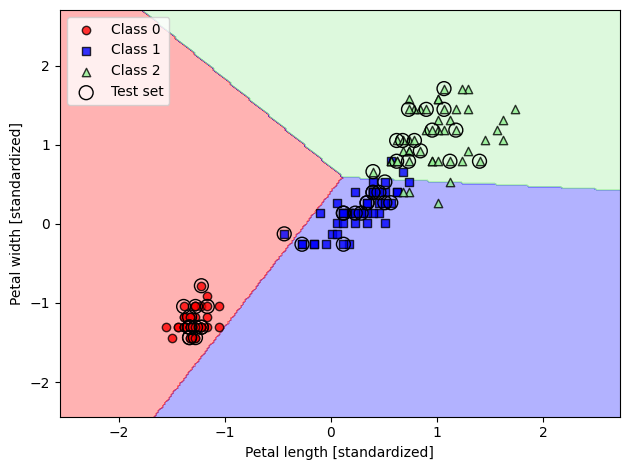

In [21]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier=ppn,
                      test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [22]:
#However, remember from our discussion in Chapter 2 that the perceptron algorithm never converges
#on datasets that aren’t perfectly linearly separable, which is why the use of the perceptron algorithm is
#typically not recommended in practice

##Logistic regression and conditional probabilities

In [23]:
import numpy as np

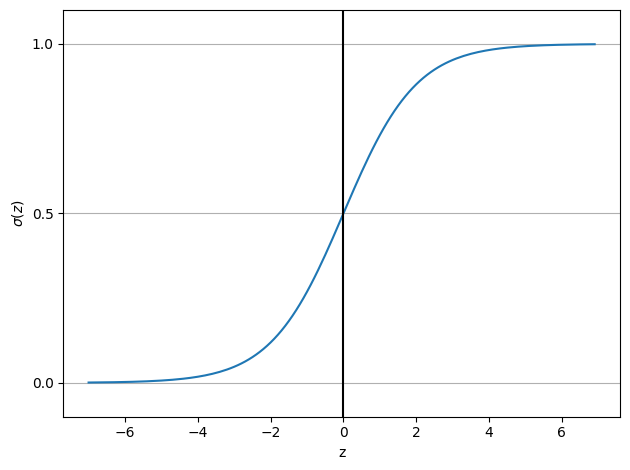

In [24]:
def sigmoid(z):
  return 1.0 / (1.0 + np.exp(-z))
z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)
plt.plot(z, sigma_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')
# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

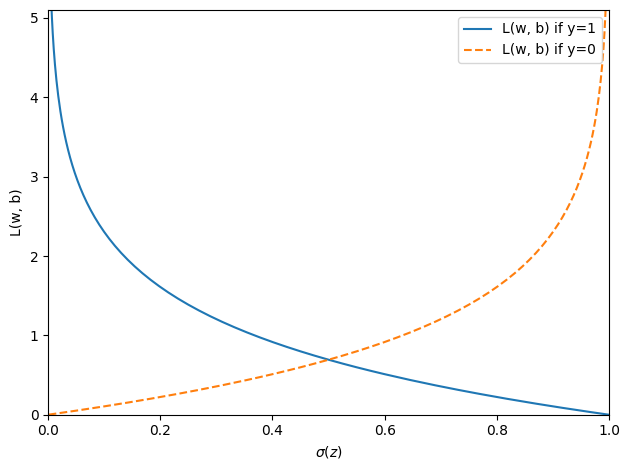

In [26]:
#Let’s write a short code snippet to create a plot that illustrates the loss of classifying a single training
#example for different values of 𝜎𝜎(𝑧𝑧):
def loss_1(z):
  return - np.log(sigmoid(z))
def loss_0(z):
  return - np.log(1 - sigmoid(z))
  z = np.arange(-10, 10, 0.1)
sigma_z = sigmoid(z)
c1 = [loss_1(x) for x in z]
plt.plot(sigma_z, c1, label='L(w, b) if y=1')
c0 = [loss_0(x) for x in z]
plt.plot(sigma_z, c0, linestyle='--', label='L(w, b) if y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\sigma(z)$')
plt.ylabel('L(w, b)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
#The resulting plot shows the sigmoid activation on the x axis in the range 0 to 1 (the inputs to the
#sigmoid function were z values in the range –10 to 10) and the associated logistic loss on the y axis:

In [29]:
#Converting an Adaline implementation into an algorithm for
#logistic regression
class LogisticRegressionGD:
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state


    """Gradient descent-based logistic regression classifier.
    Parameters
    ------------
    eta : float
    Learning rate (between 0.0 and 1.0)
    n_iter : int
    Passes over the training dataset.
    random_state : int
    Random number generator seed for random weight
    initialization.
    Attributes
    -----------
    w_ : 1d-array
    Weights after training.
    b_ : Scalar
    Bias unit after fitting.
    losses_ : list
    Mean squared error loss function values in each epoch.
    """
  def fit(self, X, y):

    """ Fit training data.
    Parameters
    ----------
    X : {array-like}, shape = [n_examples, n_features]
    Training vectors, where n_examples is the
    number of examples and n_features is the
    number of features.
    y : array-like, shape = [n_examples]
    Target values.
    Returns
    -------
    self : Instance of LogisticRegressionGD
    """
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
    self.b_ = np.float_(0.)
    self.losses_ = []
    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y - output)
      self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
      self.b_ += self.eta * 2.0 * errors.mean()
      loss = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))/ X.shape[0])
      self.losses_.append(loss)
    return self
  def net_input(self, X):
    """Calculate net input"""
    return np.dot(X, self.w_) + self.b_
  def activation(self, z):
    """Compute logistic sigmoid activation"""
    return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
  def predict(self, X):
    """Return class label after unit step"""
    return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

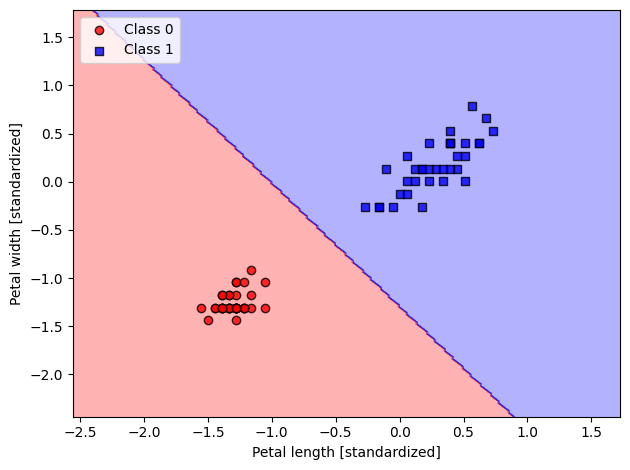

In [30]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
lrgd = LogisticRegressionGD(eta=0.3,
                            n_iter=1000,
                            random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)
plot_decision_regions(X=X_train_01_subset,
                      y=y_train_01_subset,
                      classifier=lrgd)
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

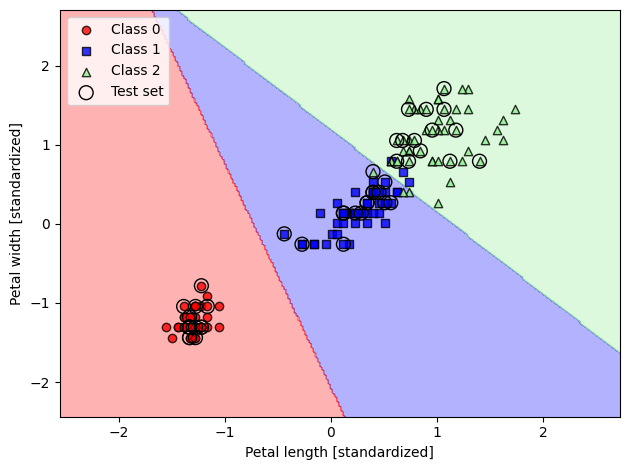

In [31]:
#Training a logistic regression model with scikit-learn
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, solver='lbfgs',
                        multi_class='ovr')
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=lr,
                      test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [33]:
#The probability that training examples belong to a certain class can be computed using the predict_
#proba method. For example, we can predict the probabilities of the first three examples in the test
#dataset as follows:
lr.predict_proba(X_test_std[:3, :])

array([[3.81527885e-09, 1.44792866e-01, 8.55207131e-01],
       [8.34020679e-01, 1.65979321e-01, 3.25737138e-13],
       [8.48831425e-01, 1.51168575e-01, 2.62277619e-14]])

In [34]:
#In practice, the more convenient way of
#obtaining class labels when using scikit-learn is to call the predict method directly:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

In [37]:
#Lastly, a word of caution if you want to predict the class label of a single flower example: scikit-learn
#expects a two-dimensional array as data input; thus, we have to convert a single row slice into such a
#format first. One way to convert a single row entry into a two-dimensional data array is to use NumPy’s
#reshape method to add a new dimension, as demonstrated here:
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

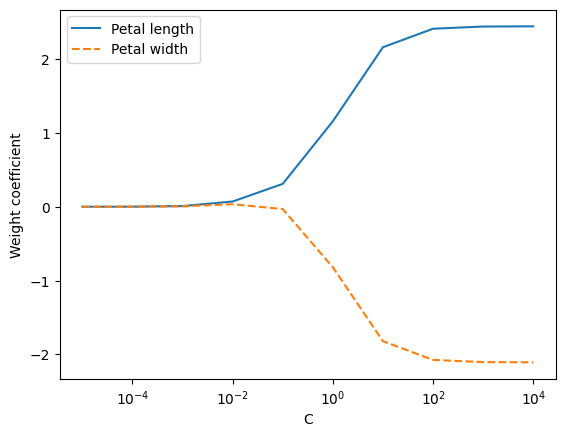

In [39]:
#The parameter, C, that is implemented for the LogisticRegression class in scikit-learn comes from
#a convention in support vector machines, which will be the topic of the next section. The term C is
#inversely proportional to the regularization parameter, 𝜆𝜆. Consequently, decreasing the value of the
#inverse regularization parameter, C, means that we are increasing the regularization strength, which
#we can visualize by plotting the L2 regularization path for the two weight coefficients:
weights, params = [], []
for c in np.arange(-5, 5):
  lr = LogisticRegression(C=10.**c,
                          multi_class='ovr')
  lr.fit(X_train_std, y_train)
  weights.append(lr.coef_[1])
  params.append(10.**c)
weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='Petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='Petal width')
plt.ylabel('Weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()
#As we can see in the resulting plot, the weight coefficients shrink if we decrease parameter C, that is,
#if we increase the regularization strength:

##Maximum margin classification with support vector machines

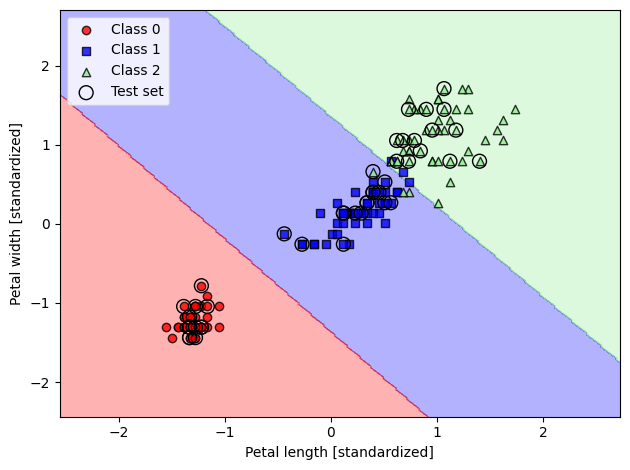

In [41]:
#let’s train an SVM model to classify
#the different flowers in our Iris dataset:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [42]:
#Alternative implementations in scikit-learn
#We could initialize the SGD version of the perceptron (loss='perceptron'), logistic regression
#(loss='log'), and an SVM with default parameters (loss='hinge'), as follows:
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

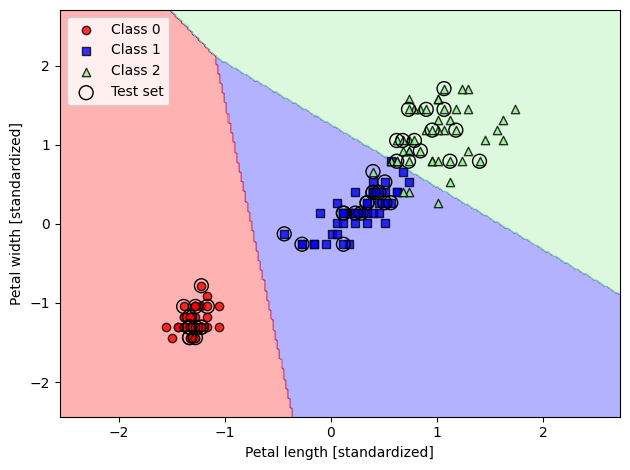

In [46]:
ppn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=ppn,
                      test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()